<a href="https://colab.research.google.com/github/AlimU11/ISQBD/blob/main/ISQBD_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python (warm-up)

## Check if the first and last number of a list is the same

In [ ]:
numbers_x = [10, 20, 30, 40, 10]
numbers_y = [75, 65, 35, 75, 30]

In [ ]:
numbers_x[0] == numbers_x[-1]

True

In [ ]:
numbers_y[0] == numbers_y[-1]

False

## Turn every item of a list into its square

In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 7]

In [ ]:
[i**2 for i in numbers]

[1, 4, 9, 16, 25, 36, 49]

## Extend list1 by list2

In [ ]:
list1 = ["A", "B"]
list2 = ["C", "D"]

In [ ]:
list1.extend(list2)
list1

['A', 'B', 'C', 'D']

## Get Only unique items from two sets

In [ ]:
set1 = {10, 20, 30, 40, 50}
set2 = {30, 40, 50, 60, 70}

In [ ]:
set1.union(set2)

{10, 20, 30, 40, 50, 60, 70}

## Return a set of elements present in Set A or B, but not both

In [ ]:
set1 = {10, 20, 30, 40, 50}
set2 = {30, 40, 50, 60, 70}

In [ ]:
set1.symmetric_difference(set2)

{10, 20, 60, 70}

## Create a Passive class without any variables and methods 

In [ ]:
class Passive:
    pass

# CRISP-DM 

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# Data Mining 

In [ ]:
import urllib

file = urllib.request
file.urlretrieve('https://github.com/AlimU11/ISQBD/blob/main/customers_data.db?raw=true', 'customers_data.db')

('customers_data.db', <http.client.HTTPMessage at 0x2cd1bfc64c0>)

## Fetch data from customer_data.db to variable df as DataFrame

In [ ]:
conn = sqlite3.connect('customers_data.db')
c = conn.cursor()

c.execute('select * from customer_churn')

df = pd.DataFrame(c.fetchall(), columns=list(map(lambda x: x[0], c.description)))

conn.close()

# Data Understanding

## Show basic info about data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Transform TotalCharges to numeric

In [ ]:
df.TotalCharges = pd.to_numeric(arg=df.TotalCharges, errors='coerce')

## Check NA values

In [ ]:
np.any(df.isnull())

True

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Drop all NA values

In [ ]:
df.dropna(inplace=True)

## Create df1 from df without customerID

In [ ]:
df1 = df.iloc[:, 1:]

## Convert Churn column to binary numeric variable

In [ ]:
df1['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

## Convert other non-numeric columns to dummies
## Assign result to variable df2

In [ ]:
df2 = pd.get_dummies(df1)

## Get columns correlation 
## (Optional) plot correlation for Churn column

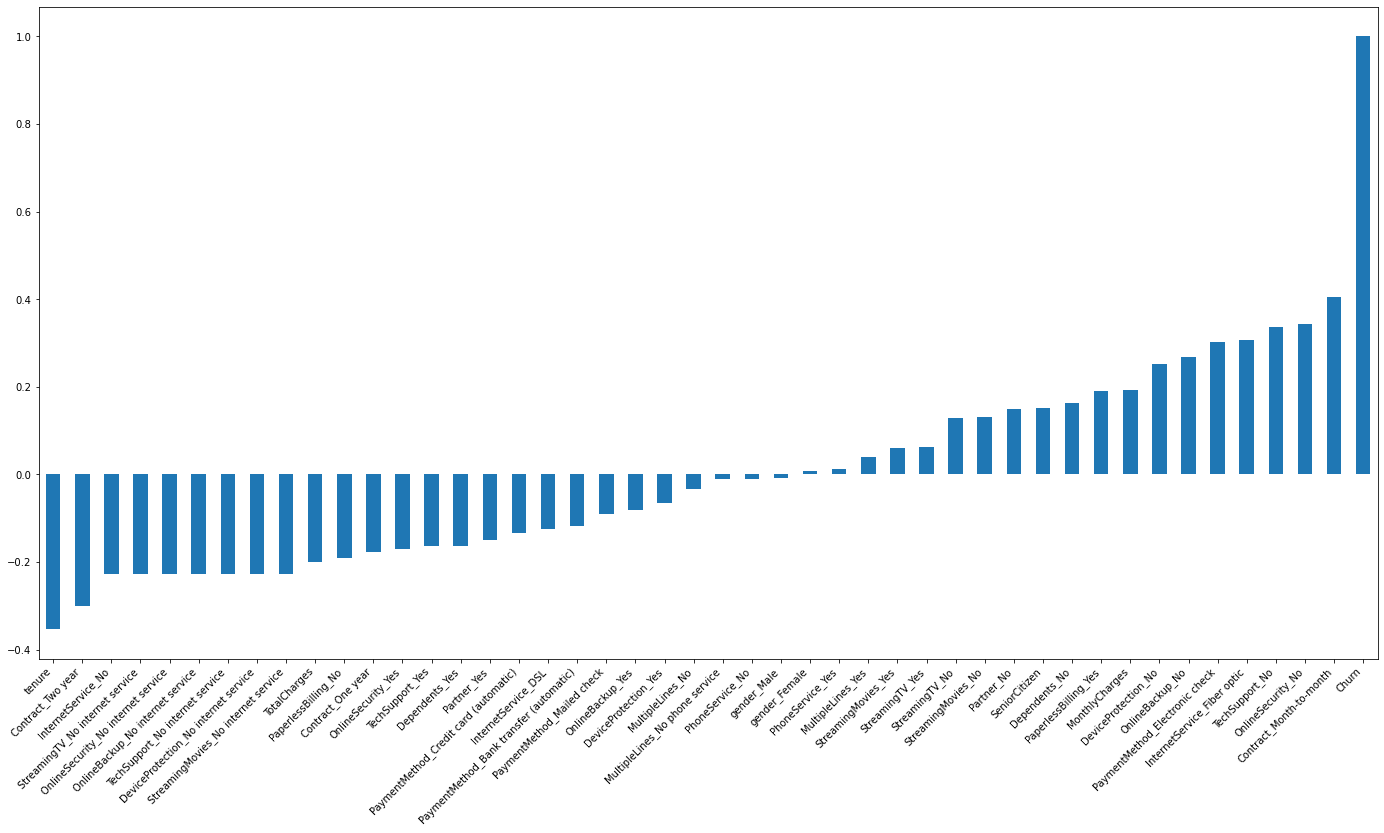

In [ ]:
plt.figure(figsize=(24, 12))
df2.corr().Churn.sort_values().plot(kind='bar')
#plt.bar(df2.corr().Churn.sort_values().index, df2.corr().Churn.sort_values().values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## Plot value counts of Contract as bar chart 

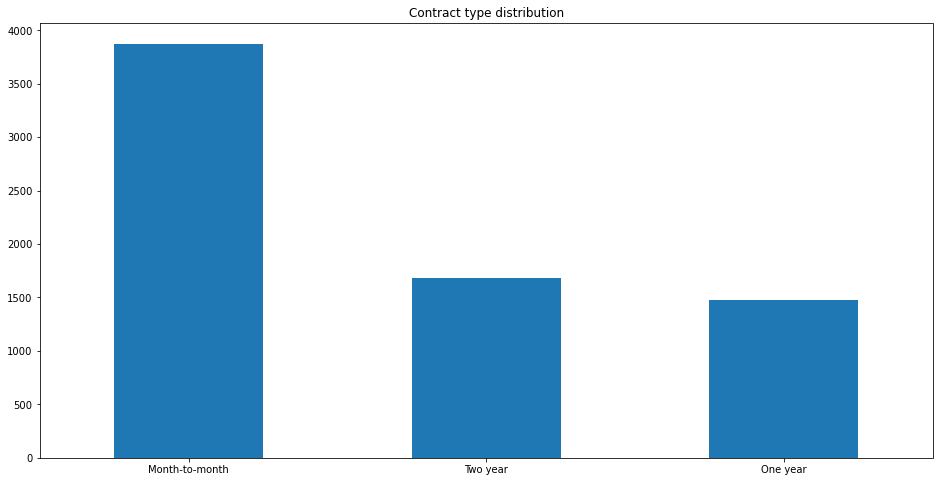

In [ ]:
plt.figure(figsize=(16,8))
df1.Contract.value_counts().plot(kind = 'bar', rot=0)
plt.title('Contract type distribution')
plt.show()

## Plot distribution of customers by their tenure

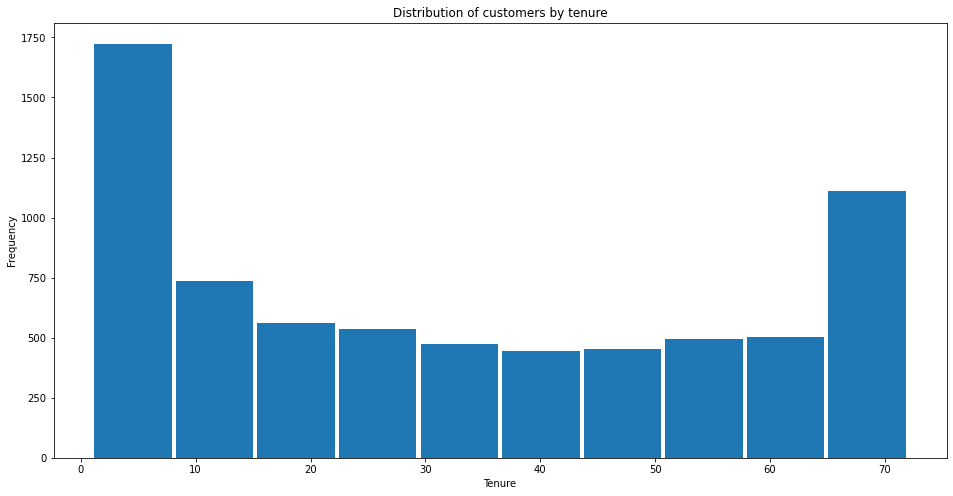

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Distribution of customers by tenure')
plt.xlabel('Tenure')
df1.tenure.plot(kind='hist', rwidth=0.95)
plt.show()

# Data Preparation

## Define X as all column from df2 except Churn column
## Define y as Churn column from df2

In [ ]:
X = df2.drop(columns = ['Churn'])
y = df2['Churn']

## Scale X using MinMaxScaler or <a href='https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing'> any other</a> of your choice

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Split X_scaled and y to train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Modeling

## Create LogisticRegression model
## use parameters solver='liblinear' and class_weight={0:1,1:2} inside constructor
## fit model using X_train, y_train

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', class_weight={0:1,1:2})
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 2}, solver='liblinear')

## Random Forest

# Create <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier"> random forest classifier </a> model

## Use following parameters inside constructor
### n_estimators=1000
### oob_score = True
### n_jobs = -1
### random_state=50
### max_features = "auto"
### max_leaf_nodes=30
### class_weight={0:1,1:2}

# fit model with X_train and y_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
n_estimators=1000,
oob_score = True,
n_jobs = -1,
random_state=50,
max_features = "auto",
max_leaf_nodes=30,
class_weight={0:1,1:2},
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_leaf_nodes=30,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=50)

## XGBoost

## Create XGBClassifier model named xgb_cl from xgboost model
## Use parameter 
## use_label_encoder=False
## for constructor
## Fit model with X_train, y_train
## Use sample_weight=w_array inside fit function

In [ ]:
w_array = np.array([1]*y_train.shape[0], dtype=float)
w_array[y_train==1] = 0.90
w_array[y_train==0] = 0.10

In [ ]:
from xgboost import XGBClassifier

xgb_cl = XGBClassifier(use_label_encoder=False)
xgb_cl.fit(X_train, y_train, sample_weight=w_array)

C:\Users\alimu\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[23:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Evaluation

## use predict function for all models above
## Use recall_score from sklearn.metrics to compare y_test and prediction results

In [ ]:
from sklearn import metrics

In [ ]:
metrics.recall_score(y_test, lr.predict(X_test))

0.7270742358078602

In [ ]:
metrics.recall_score(y_test, rf.predict(X_test))

0.6943231441048034

In [ ]:
metrics.recall_score(y_test, xgb_cl.predict(X_test))

0.8362445414847162

## Launch cells to show feature importance and confusion matrix for xgb classifier

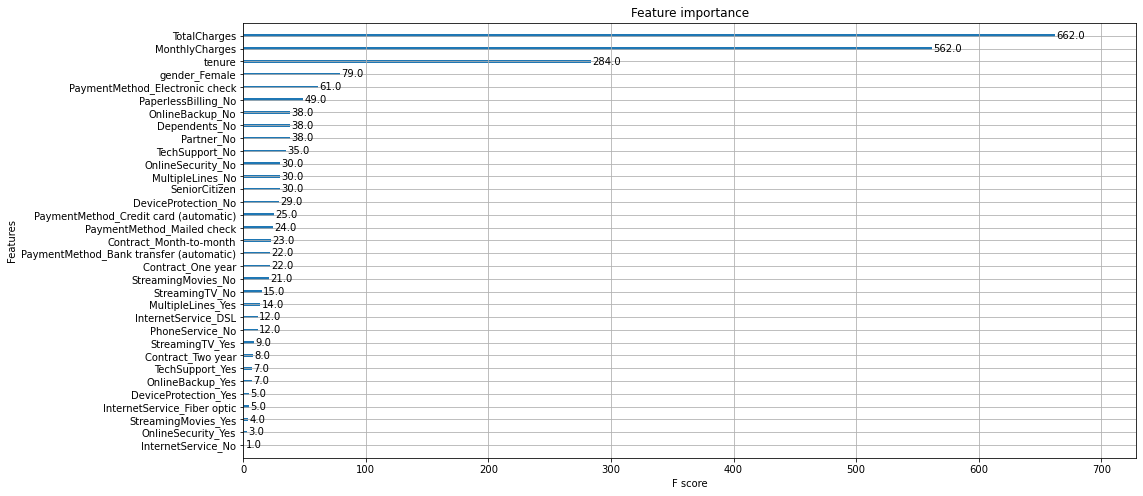

In [ ]:
import xgboost as xgb

xgb_cl.get_booster().feature_names = list(X.columns.values)

fig, ax = plt.subplots(figsize=(16,8))
xgb.plot_importance(xgb_cl, ax=ax)

plt.show()

<AxesSubplot:>

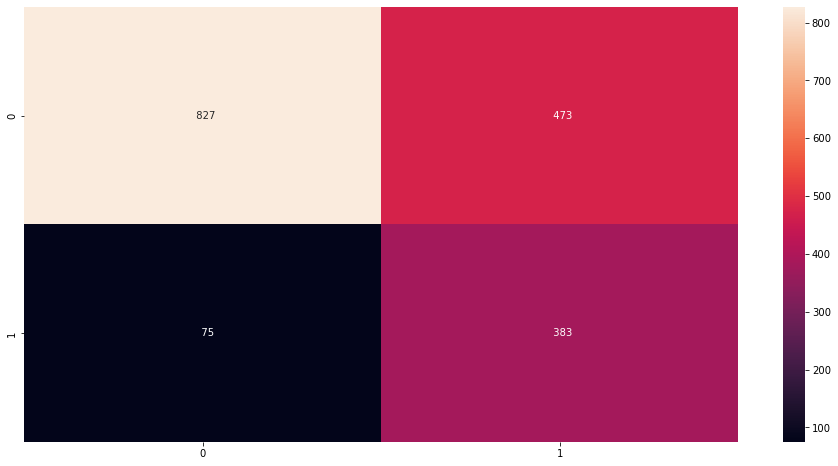

In [ ]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(confusion_matrix(y_test, xgb_cl.predict(X_test)), annot=True, fmt='5')

# Deployment

## Use pickle to dump model object
## dump scaler object, use '.sav' extension

In [ ]:
import pickle

pickle.dump(xgb_cl, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.sav', 'wb'))

##  Deployment (optional, requires installation in local environment)

In [ ]:
from werkzeug.wrappers import Request, Response
from werkzeug import run_simple
from flask import Flask, request, render_template


app = Flask(__name__, template_folder='')

model = pickle.load(open('model.pkl', 'rb'))

# scale values for prediction to the same distribution
scaler = pickle.load(open('scaler.sav', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/', methods=['POST'])
def predict():
    temp = [i for i in request.form.values()]
    
    # Process values from request in order to transform to required for model shape
    row_dict = {column: np.array([], dtype=df1.dtypes.values[i]) for i, column in enumerate(df1.columns.values[:-1])}
    for i, column in enumerate(row_dict.keys()):
        row_dict[column] = np.append(row_dict[column], temp[i]).astype(df1.dtypes.values[i])

    # Create rows from unique values of initial data
    # The easiest way to produce the same values with pd.get_dummies for only one row data from request
    unique_dict = {}
    mask = df1.iloc[:, np.argwhere(((df1.dtypes != np.int64) & (df1.dtypes != np.float64)).values).reshape(-1)]
 
    for column in df1.columns.values[:-1]:
        unique_dict[column] = 0

    for column in mask.columns:
        unique_dict[column] = mask[column].unique()

    for i in range(mask.nunique().max()):
        for column in mask.columns:
            if len(unique_dict[column]) < mask.nunique().max():
                unique_dict[column] = np.append(unique_dict[column], unique_dict[column][0])

    unique_dict['SeniorCitizen'] = [0, 1, 0, 0]

    unique_df = pd.DataFrame.from_dict(unique_dict)
    unique_df1 = pd.concat([unique_df, pd.DataFrame.from_dict(row_dict)])
    
    # assert unique values match
    # theoretically it can fail in case it receives another categorical variables (from request combobox)
    assert np.all(np.hstack(np.array([unique_df[i].unique() for i in unique_df.loc[:, ~unique_df.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges'])].columns], dtype=object)) == 
                  np.hstack(np.array([unique_df1[i].unique() for i in unique_df1.loc[:, ~unique_df1.columns.isin(['tenure', 'MonthlyCharges', 'TotalCharges'])].columns], dtype=object)))
    
    df_dummies = pd.get_dummies(unique_df1)
    X = scaler.transform(df_dummies)
    return render_template('index.html', prediction_text = 'Churn detected' if model.predict(X[-1].reshape(1, -1))[0] else 'No churn expected')   

if __name__ == "__main__":
    run_simple('localhost', 9000, app)